<img src='11.jpg'>

In [3]:
#pip install pycaret

In [1]:
import pandas as pd

In [2]:
# Clustering

In [3]:
df=pd.read_csv('heart_disease.csv')

In [4]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


In [26]:
from pycaret.clustering import*

In [5]:
df['sex'] = df['sex'].str.replace('Female', '0').str.replace('Male', '1').astype(int)

In [6]:
df.astype(float, errors='ignore')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0.0,63.0,1.0,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1.0,67.0,1.0,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2.0,67.0,1.0,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3.0,37.0,1.0,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4.0,41.0,0.0,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915.0,54.0,0.0,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916.0,62.0,1.0,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917.0,55.0,1.0,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918.0,58.0,1.0,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data=pd.get_dummies(df,drop_first=True)

In [8]:
data

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0,63,1,145.0,233.0,150.0,2.3,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,67,1,160.0,286.0,108.0,1.5,3.0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,67,1,120.0,229.0,129.0,2.6,2.0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,3,37,1,130.0,250.0,187.0,3.5,0.0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,4,41,0,130.0,204.0,172.0,1.4,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,0,127.0,333.0,154.0,0.0,NaN,0,0,...,0,0,1,0,1,0,0,0,0,0
916,916,62,1,NaN,139.0,NaN,NaN,NaN,0,0,...,0,1,0,0,1,0,0,0,0,0
917,917,55,1,122.0,223.0,100.0,0.0,NaN,0,0,...,0,0,1,0,1,0,0,0,0,0
918,918,58,1,NaN,385.0,NaN,NaN,NaN,0,0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
setup(data)

,Description,Value
0,Session id,426
1,Original data shape,"(920, 22)"
2,Transformed data shape,"(920, 22)"
3,Numeric features,22
4,Rows with missing values,66.5%
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,CPU Jobs,-1


In [32]:
kmeans=create_model('kmeans',4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.5574,2347.6228,0.5733,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [19]:
plot_model(kmeans)

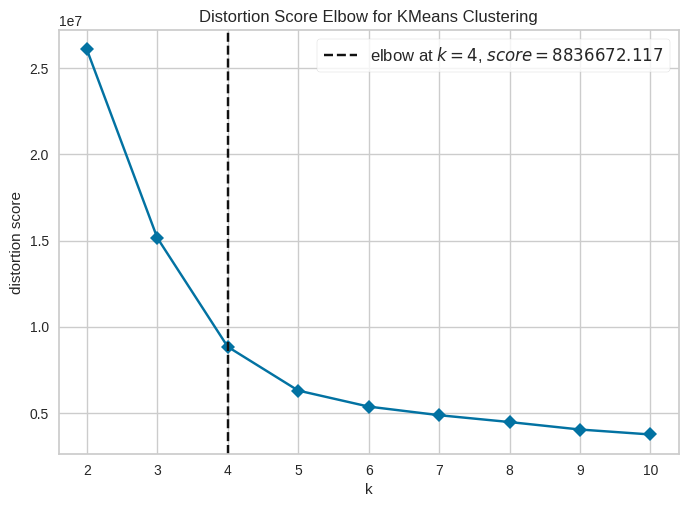

In [20]:
plot_model(kmeans,plot='elbow')

In [21]:
plot_model(kmeans,plot='tsne')

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\user\AppData\Local\Temp\ipykernel_8096\2372545485.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True);


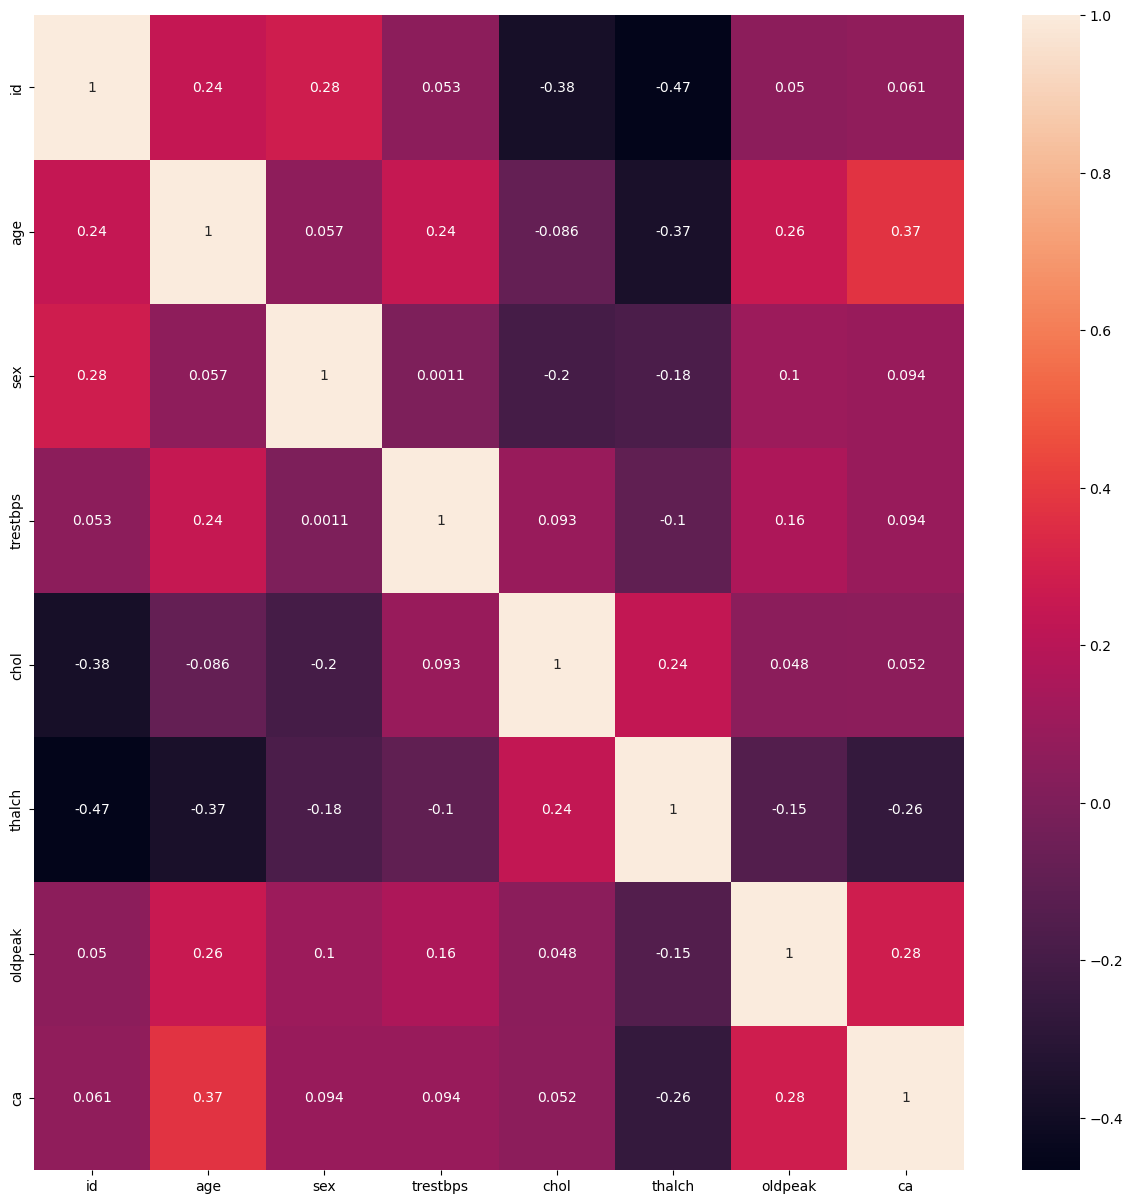

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

In [11]:
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod

In [12]:
model=KMeans(4)  #benzerliklerine göre 4 gruba ayıracağımızı tahmin ediyoruz

In [15]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [18]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,1,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,1,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,1,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,1,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,0,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,0,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN
916,916,62,1,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,917,55,1,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect
918,918,58,1,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data=pd.get_dummies(df,drop_first=True)

#yazıları sayıya çevirdik
#df yerine data kullandık. df nin orjinali bozulmasın kalsın diye 

In [21]:
data

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0,63,1,145.0,233.0,150.0,2.3,0.0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,67,1,160.0,286.0,108.0,1.5,3.0,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,67,1,120.0,229.0,129.0,2.6,2.0,0,0,...,0,0,0,0,0,1,1,0,0,1
3,3,37,1,130.0,250.0,187.0,3.5,0.0,0,0,...,1,0,0,1,0,0,0,0,1,0
4,4,41,0,130.0,204.0,172.0,1.4,0.0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,0,127.0,333.0,154.0,0.0,NaN,0,0,...,0,0,1,0,1,0,0,0,0,0
916,916,62,1,NaN,139.0,NaN,NaN,NaN,0,0,...,0,1,0,0,1,0,0,0,0,0
917,917,55,1,122.0,223.0,100.0,0.0,NaN,0,0,...,0,0,1,0,1,0,0,0,0,0
918,918,58,1,NaN,385.0,NaN,NaN,NaN,0,0,...,0,0,1,0,0,0,0,0,0,0


In [24]:
data.isnull().sum()

id                            0
age                           0
sex                           0
trestbps                     59
chol                         30
thalch                       55
oldpeak                      62
ca                          611
dataset_Hungary               0
dataset_Switzerland           0
dataset_VA Long Beach         0
cp_atypical angina            0
cp_non-anginal                0
cp_typical angina             0
fbs_True                      0
restecg_normal                0
restecg_st-t abnormality      0
exang_True                    0
slope_flat                    0
slope_upsloping               0
thal_normal                   0
thal_reversable defect        0
dtype: int64

In [27]:
data.fillna(df.mean(),inplace=True)

#Boş olan değerlerin hepsini ortalama ile doldurduk

C:\Users\user\AppData\Local\Temp\ipykernel_8096\235852421.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(df.mean(),inplace=True)


In [28]:
data.isnull().sum()

id                          0
age                         0
sex                         0
trestbps                    0
chol                        0
thalch                      0
oldpeak                     0
ca                          0
dataset_Hungary             0
dataset_Switzerland         0
dataset_VA Long Beach       0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
fbs_True                    0
restecg_normal              0
restecg_st-t abnormality    0
exang_True                  0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [29]:
data

,id,age,sex,trestbps,chol,thalch,oldpeak,ca,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,0,63,1,145.000000,233.0,150.000000,2.300000,0.000000,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,67,1,160.000000,286.0,108.000000,1.500000,3.000000,0,0,...,0,0,0,0,0,1,1,0,1,0
2,2,67,1,120.000000,229.0,129.000000,2.600000,2.000000,0,0,...,0,0,0,0,0,1,1,0,0,1
3,3,37,1,130.000000,250.0,187.000000,3.500000,0.000000,0,0,...,1,0,0,1,0,0,0,0,1,0
4,4,41,0,130.000000,204.0,172.000000,1.400000,0.000000,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,915,54,0,127.000000,333.0,154.000000,0.000000,0.676375,0,0,...,0,0,1,0,1,0,0,0,0,0
916,916,62,1,132.132404,139.0,137.545665,0.878788,0.676375,0,0,...,0,1,0,0,1,0,0,0,0,0
917,917,55,1,122.000000,223.0,100.000000,0.000000,0.676375,0,0,...,0,0,1,0,1,0,0,0,0,0
918,918,58,1,132.132404,385.0,137.545665,0.878788,0.676375,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
model=model.fit(data) #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [32]:
tahmin=model.predict(data)  # benzerliklerine göre 4 grupta tahmin etti

In [33]:
silhouette_score(data,tahmin)

0.5573810939948652

In [34]:
pip install yellowbrick  ---veri görselleştirmeyi daha güzel yapan paket

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\user\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\user\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\user\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\user\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\user\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: ---veri


In [35]:
from yellowbrick.cluster import KElbowVisualizer

In [36]:
km=KMeans()

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

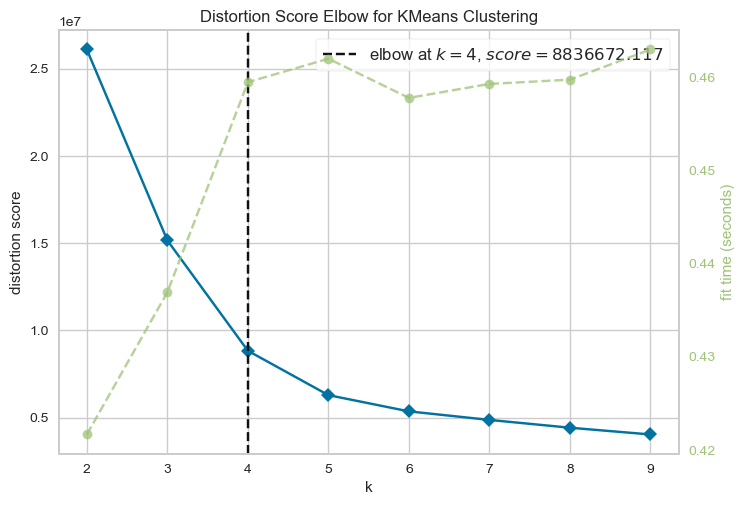

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(data)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor

# Hierarchical Clustering- Hiyerarşi-ikinci bir gruplama

In [39]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [40]:
data=linkage(data,method='ward',metric='euclidean')

#ward = en optimimu bulmaya yarıyor hatayı minimize ediyor
#euclidean = uzaklıkları ölçmeye yarıyor

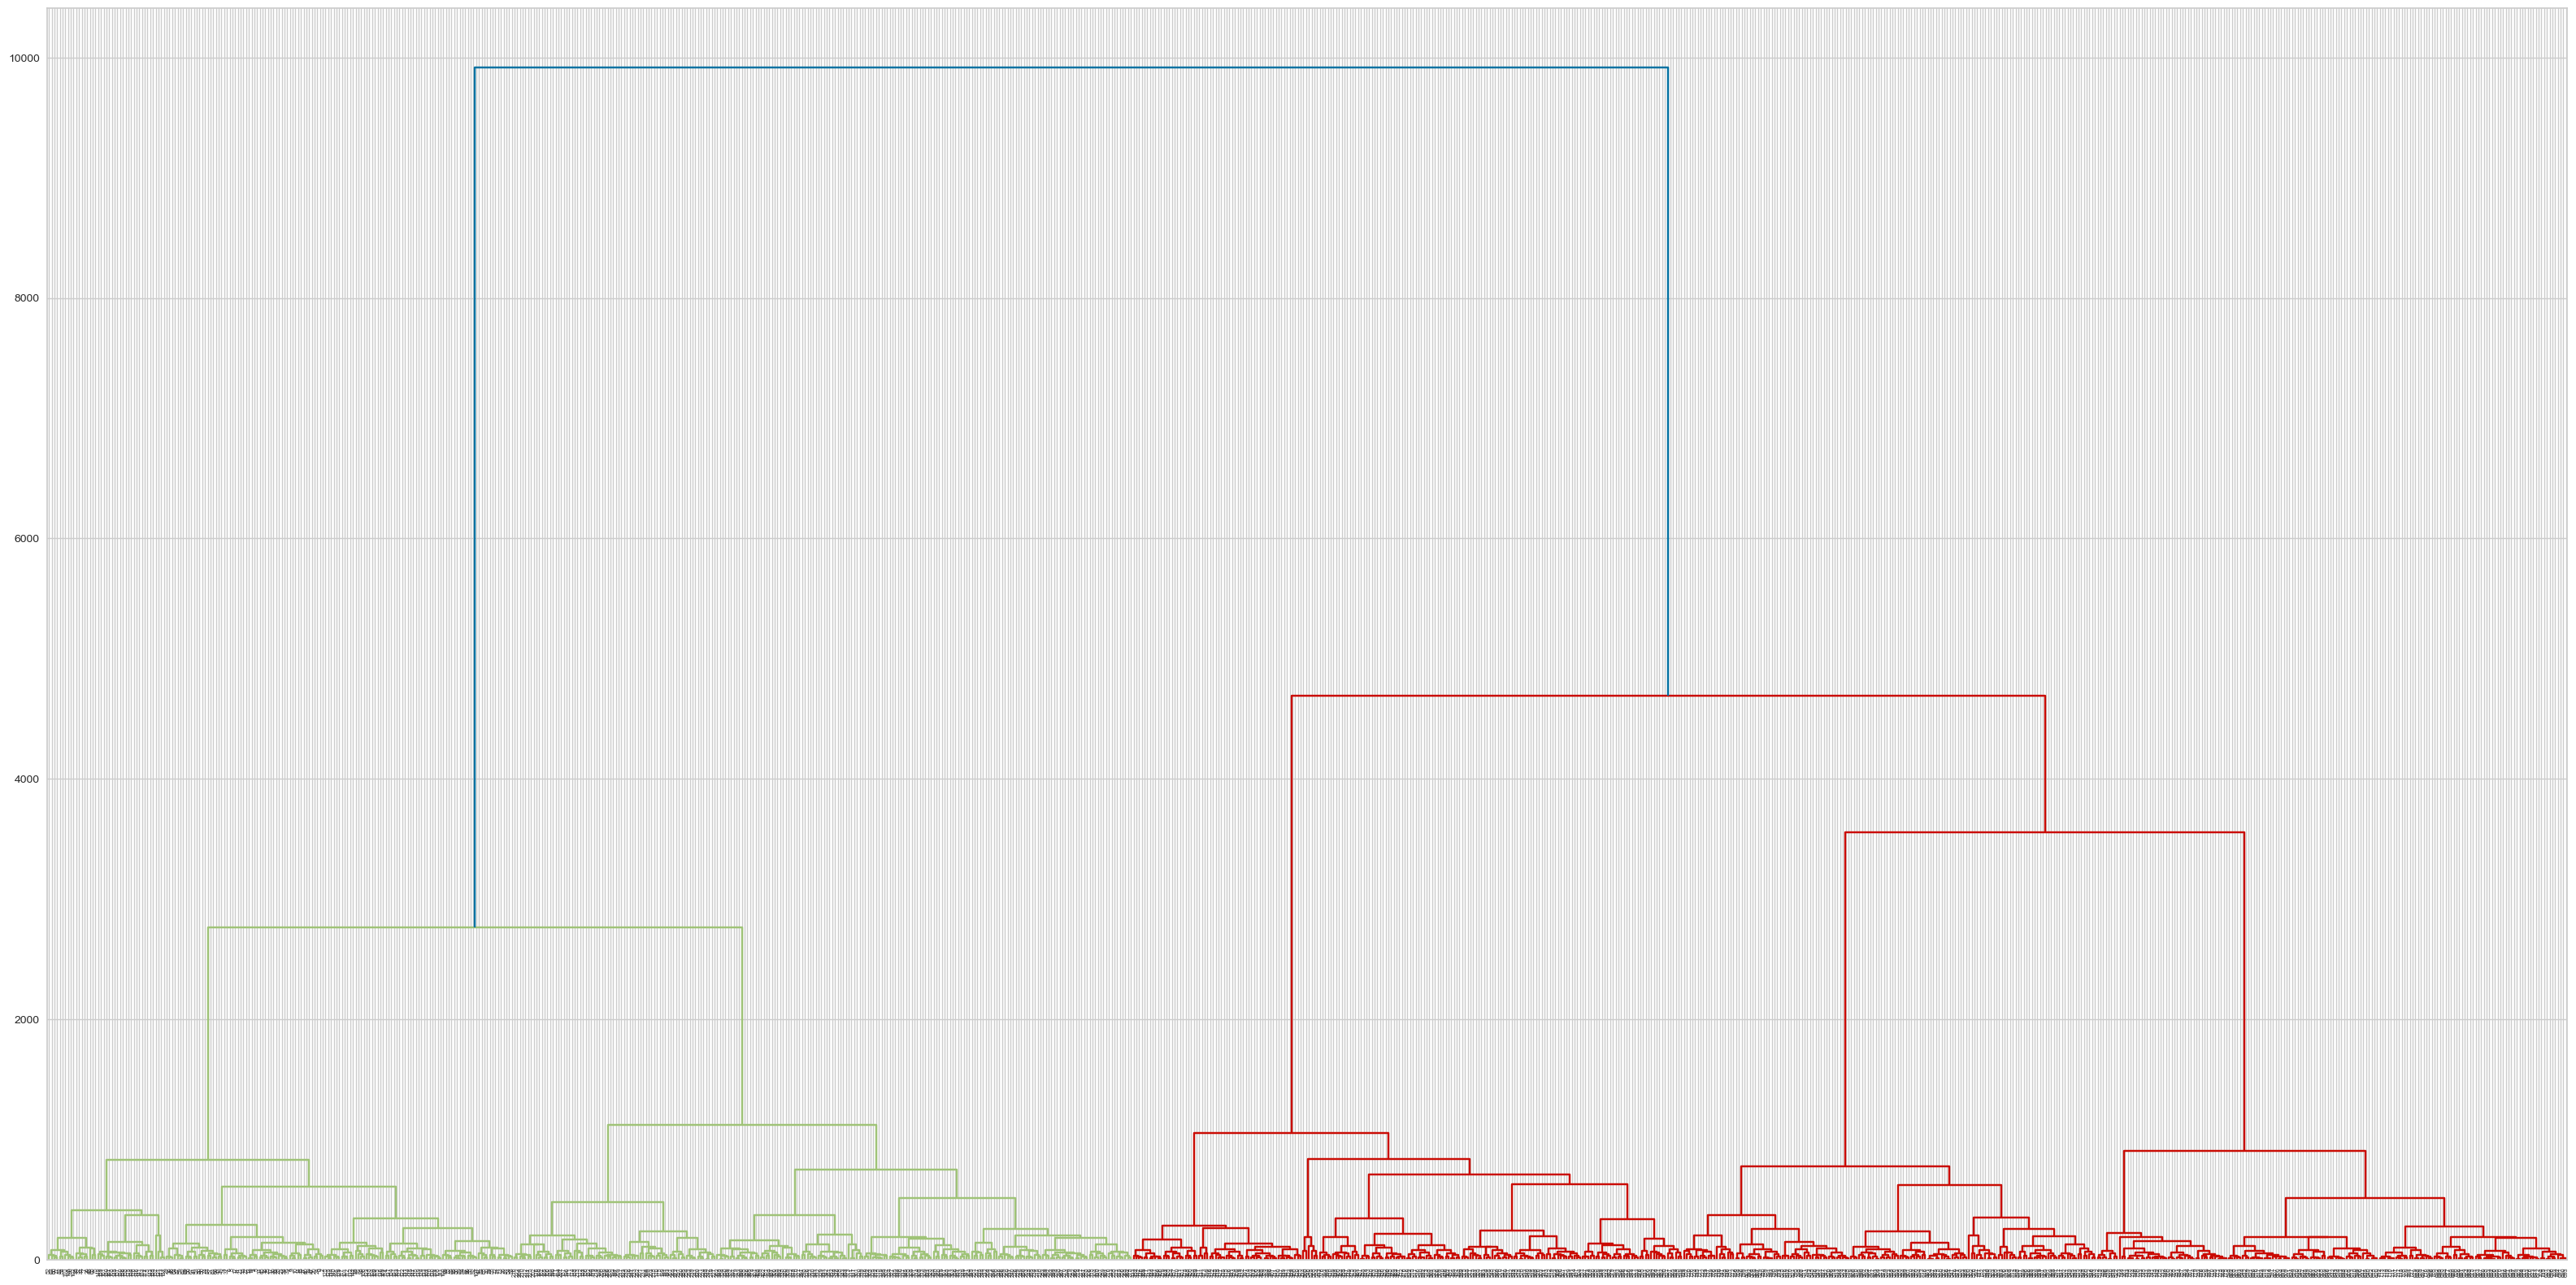

In [41]:
plt.figure(figsize=(40,20))
dendrogram(data)
plt.show()